In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from mpl_finance import candlestick_ohlc

%matplotlib notebook
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv("EURUSD_1d_output_with_null_value.csv")
dt.index = pd.to_datetime(dt.Date, format = '%Y.%m.%d')
dt = dt.loc['2019.01.01':]
dt.head()

,Unnamed: 0,Date,Time,Open,High,Low,Close,Volume,volume_adi,volume_obv,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,12025,2019.01.02,00:00,1.14454,1.14967,1.13247,1.13437,75137,-3.526158e+06,3456737,...,38.295964,32.688077,66.518423,-67.311923,0.004214,1.139820,-0.128540,-1.011379,-1.016528,111.281430
2019-01-03,12026,2019.01.03,00:00,1.13436,1.14107,1.13088,1.13929,112036,-3.453263e+06,3568773,...,46.267841,54.333480,58.345455,-45.666520,0.003679,1.139814,0.774858,0.433721,0.432783,112.197802
2019-01-04,12027,2019.01.04,00:00,1.13923,1.14187,1.13453,1.13955,87686,-3.421008e+06,3656459,...,46.654898,55.477343,47.499633,-44.522657,0.003075,1.139812,0.426541,0.022821,0.022819,112.246228
2019-01-07,12028,2019.01.07,00:00,1.13957,1.14821,1.13952,1.14739,61863,-3.370820e+06,3718322,...,53.855806,88.656716,66.155846,-11.343284,0.002664,1.139882,1.002641,0.687991,0.685635,113.706463
2019-01-08,12029,2019.01.08,00:00,1.14737,1.14841,1.14216,1.14406,65376,-3.396447e+06,3652946,...,49.665811,70.143693,71.425918,-29.856307,0.002786,1.139981,0.567862,-0.290224,-0.290646,113.086236


In [3]:
Close = dt.Close
Close.index = pd.to_datetime(dt.Date, format = '%Y.%m.%d')
Close = Close.loc['2019.01.01':]
Close.head()

Date
2019-01-02    1.13437
2019-01-03    1.13929
2019-01-04    1.13955
2019-01-07    1.14739
2019-01-08    1.14406
Name: Close, dtype: float64

In [4]:
lag5Close = Close.shift(5)
momentum5 = Close - lag5Close

<IPython.core.display.Javascript object>


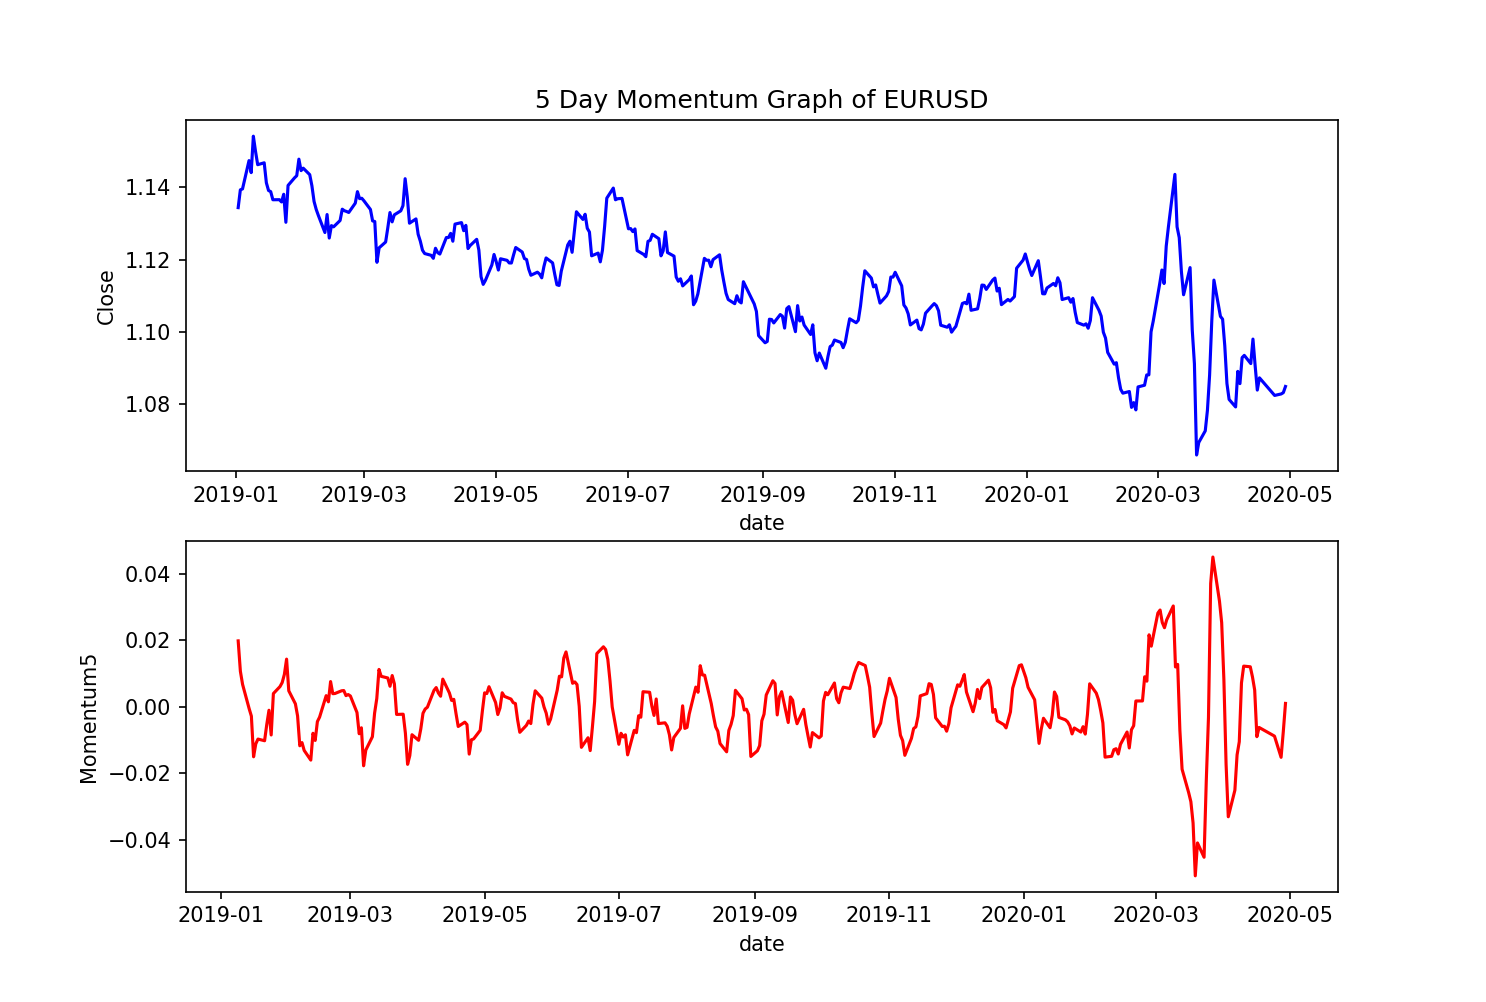

Text(0, 0.5, 'Momentum5')

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.plot(Close, 'b')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('5 Day Momentum Graph of EURUSD')
plt.subplot(212)
plt.plot(momentum5, 'r-')
plt.xlabel('date')
plt.ylabel('Momentum5')

In [6]:
def momentum(price, period):
    lagPrice = price.shift(period)
    momen = price - lagPrice
    momen = momen.dropna()
    return(momen)

In [7]:
def candleLinePlots(candleData, candleTitle='a', **kwargs):
    Date = [date2num(date) for date in candleData.index]
    candleData.loc[:,'Date'] = Date
    listData = []
    
    for i in range(len(candleData)):
        a = [candleData.Date[i],\
            candleData.Open[i],candleData.High[i],\
            candleData.Low[i],candleData.Close[i]]
        listData.append(a)

    ax = plt.subplot()
    
    flag=0
    if kwargs:
        if kwargs['splitFigures']:
            ax = plt.subplot(211)
            ax2= plt.subplot(212)
            flag=1;
        
        for key in kwargs:
            if key=='title':
                ax2.set_title(kwargs[key])
            if key=='ylabel':
                ax2.set_ylabel(kwargs[key])
            if key=='grid':
                ax2.grid(kwargs[key])
            if key=='Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)
                    
                
                if kwargs[key].ndim==1:
                    plt.plot(kwargs[key],\
                             color='k',\
                             label=kwargs[key].name)
                    plt.legend(loc='best')
                
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:,0], color='k', 
                             label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==3]):
                    plt.plot(kwargs[key].iloc[:,0], color='k', 
                             label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.bar(x=kwargs[key].index,\
                            height=kwargs[key].iloc[:,2],\
                            label=kwargs[key].iloc[:,2].name,color='r')
                    plt.legend(loc='best')
    
    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)
    
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=20,\
             horizontalalignment='center')
    ax.autoscale_view()
    
    return(plt.show())

In [9]:
mom35eurusd = momentum(Close, 35)
mom35eurusd.head()

Date
2019-02-20   -0.00086
2019-02-21   -0.00599
2019-02-22   -0.00652
2019-02-25   -0.01179
2019-02-26   -0.00526
Name: Close, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<IPython.core.display.Javascript object>


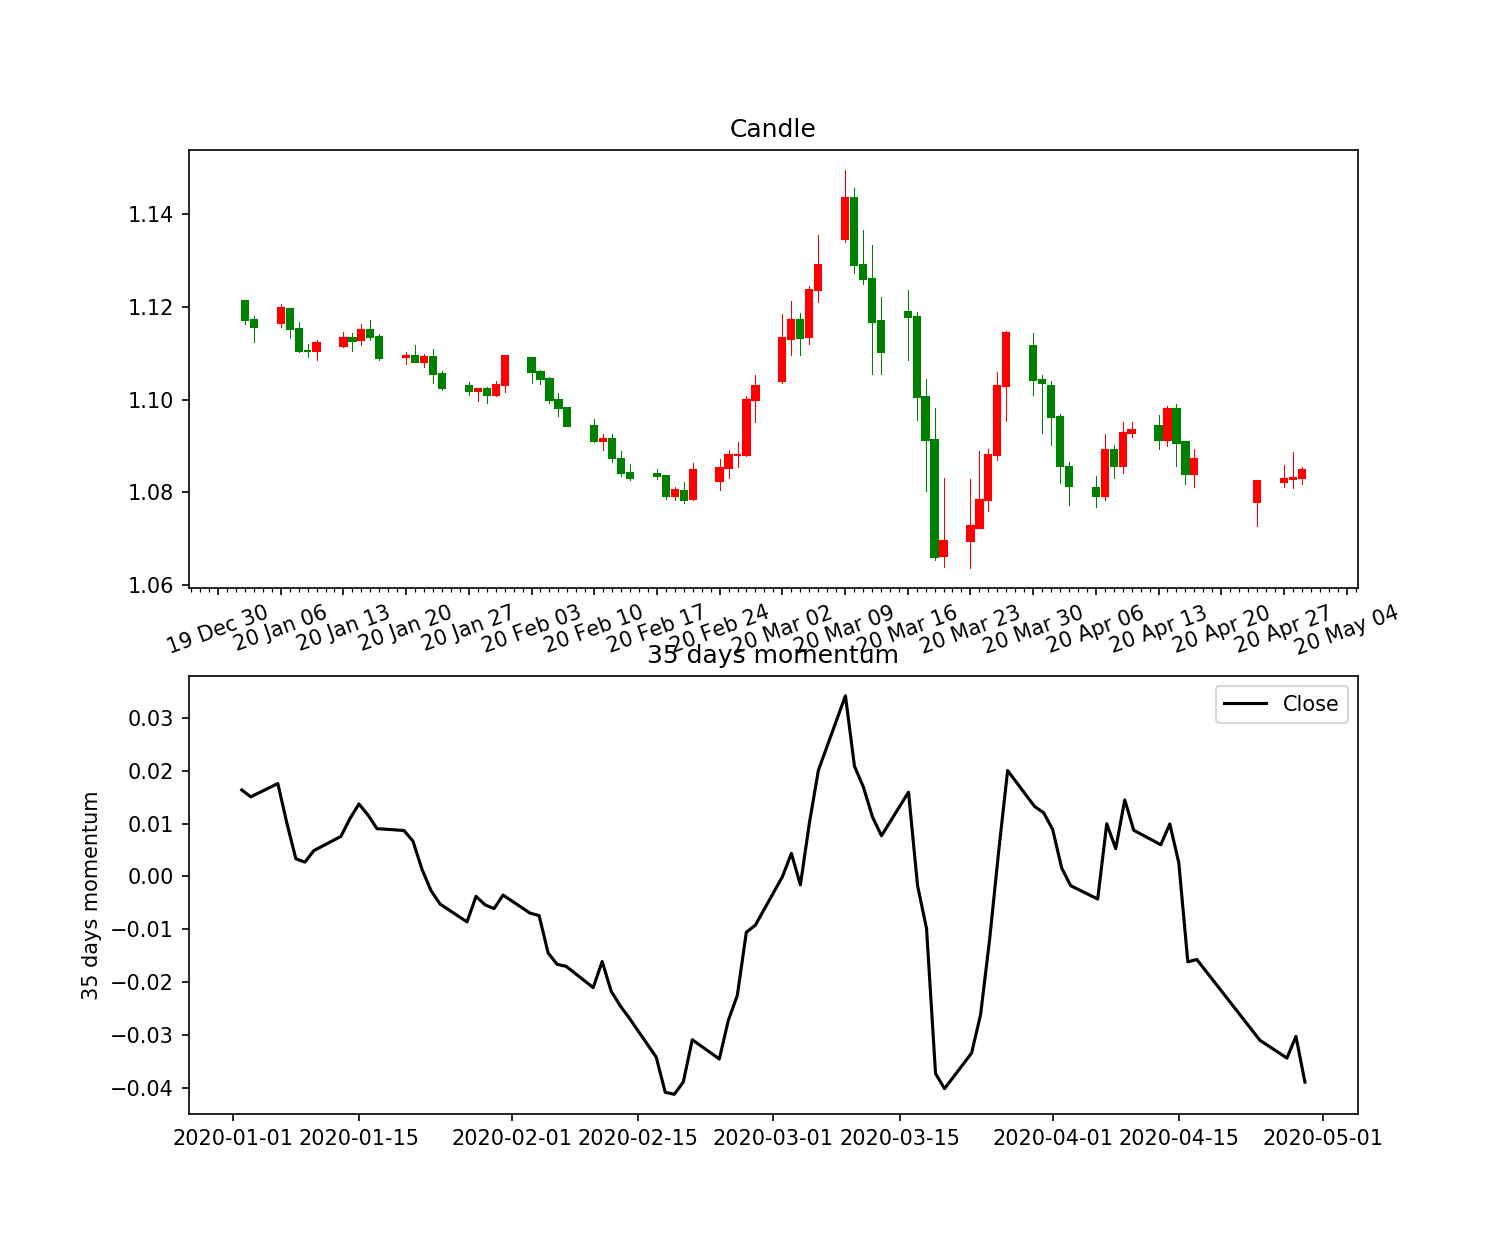

In [10]:
candleLinePlots(dt['2020'], candleTitle = 'Candle', splitFigures = True, Data = mom35eurusd['2020'],\
                title = '35 days momentum', ylabel = '35 days momentum')

In [11]:
signal = [1 if mom35Value > 0 else -1 for mom35Value in mom35eurusd]
signal = pd.DataFrame(signal , index = mom35eurusd.index, columns = ['Signal'])

In [12]:
tradeSig = np.array(signal.shift(1).dropna())
ret = (Close / Close.shift(1) - 1)
ret = np.array(ret['2019-02-21':])

In [13]:
Mom35Ret = pd.DataFrame()
for i in range(len(tradeSig)):
    Mom35Ret = Mom35Ret.append([int(tradeSig[i]) * ret[i]])

Mom35Ret.index = pd.to_datetime(dt['2019-02-21':].Date,format = '%Y.%m.%d')
Mom35Ret

,0
Date,
2019-02-21,0.000185
2019-02-22,0.000238
2019-02-25,-0.002268
2019-02-26,-0.002818
2019-02-27,0.001712
...,...
2020-04-17,-0.003128
2020-04-24,0.004479
2020-04-27,-0.000379


In [14]:
win = Mom35Ret[Mom35Ret > 0].dropna()
winrate = len(win) / len(Mom35Ret)
winrate

0.4967105263157895

<IPython.core.display.Javascript object>


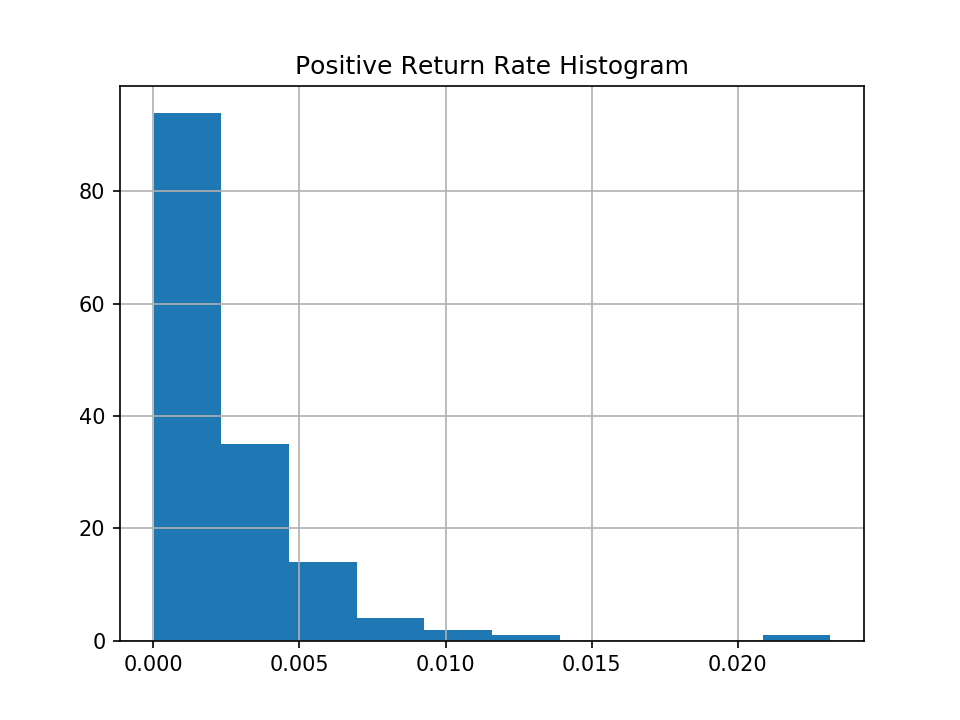

Text(0.5, 1.0, 'Positive Return Rate Histogram')

In [15]:
win.hist()
plt.show()
plt.title("Positive Return Rate Histogram")

<IPython.core.display.Javascript object>


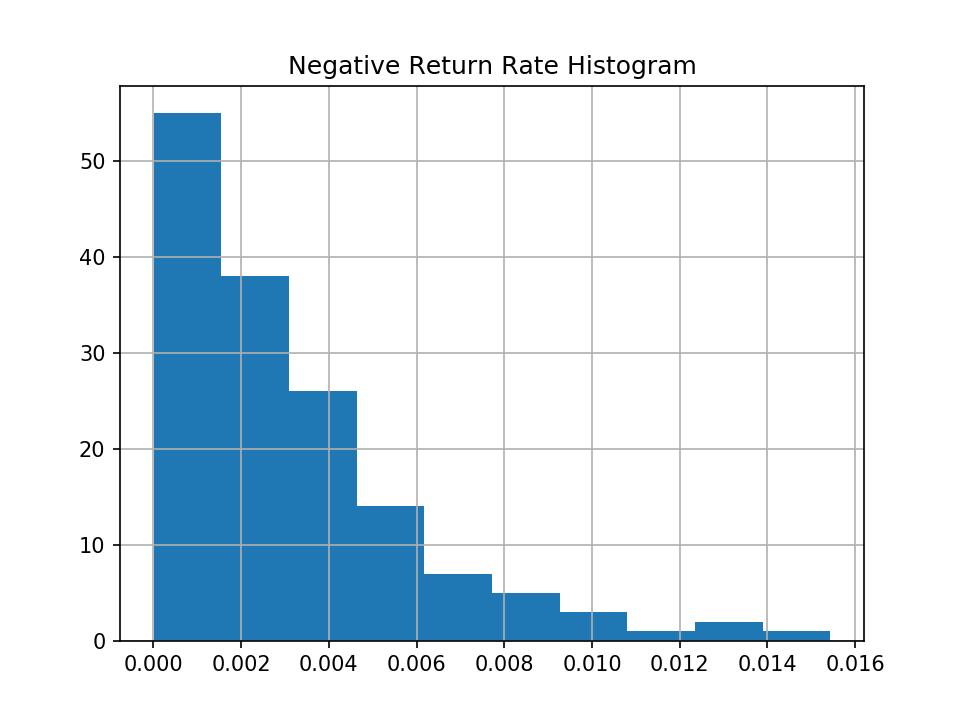

In [16]:
loss = -Mom35Ret[Mom35Ret < 0].dropna()
loss.hist()
plt.title("Negative Return Rate Histogram")
plt.show()

In [17]:
performance = {'win': win.describe(), 'loss':loss.describe()}
performance

{'win':                 0
 count  151.000000
 mean     0.002527
 std      0.002828
 min      0.000018
 25%      0.000766
 50%      0.001767
 75%      0.003443
 max      0.023159,
 'loss':                 0
 count  152.000000
 mean     0.003108
 std      0.002833
 min      0.000009
 25%      0.001020
 50%      0.002387
 75%      0.004065
 max      0.015433}